In [2]:
import pandas as pd
df = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", sheet_name='customers')
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


1. Tutte le informazioni su un cliente di cui si inserisce il nome e il cognome

In [39]:
nome, cognome = input('Inseisci il nome: ').capitalize() , input('Inserisci il cognome: ').capitalize() 
df[(df['first_name'].str.contains(nome)) & (df['last_name'].str.contains(cognome))]

Inseisci il nome: Debra
Inserisci il cognome: Burks


,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0


2. L'elenco dei clienti che risiedono in una certa città inserita dall'utente

In [12]:
città = input('Inserisci la città: ')
df[df['city'].str.contains(città)]

Inserisci la città: San Lorenzo


,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
46,47,Bridgette,Guerra,NaN,bridgette.guerra@hotmail.com,9982 Manor Drive,San Lorenzo,CA,94580.0
80,81,Zina,Bonner,NaN,zina.bonner@hotmail.com,9312 8th Street,San Lorenzo,CA,94580.0
281,282,Randolph,Chase,NaN,randolph.chase@yahoo.com,828 Bridle Ave.,San Lorenzo,CA,94580.0
443,444,Caridad,Compton,NaN,caridad.compton@aol.com,9575 SW. Kingston Court,San Lorenzo,CA,94580.0
560,561,Kandace,Hughes,NaN,kandace.hughes@hotmail.com,482 Ryan Ave.,San Lorenzo,CA,94580.0
577,578,Salena,Day,NaN,salena.day@msn.com,8067 Park Court,San Lorenzo,CA,94580.0
620,621,Basil,Ballard,NaN,basil.ballard@yahoo.com,7477 Belmont Ave.,San Lorenzo,CA,94580.0
1064,1065,Desiree,Branch,NaN,desiree.branch@msn.com,67 Bayport Drive,San Lorenzo,CA,94580.0
1291,1292,Lakenya,Oliver,NaN,lakenya.oliver@yahoo.com,82 Bayport Court,San Lorenzo,CA,94580.0
1444,1445,Ester,Acevedo,NaN,ester.acevedo@gmail.com,671 Miles Court,San Lorenzo,CA,94580.0


3. Il numero di clienti per ogni stato. 

In [31]:
clientixstato = df.groupby('state').count()['customer_id'].reset_index().sort_values(by='customer_id', ascending=False)
clientixstato

,state,customer_id
1,NY,1019
0,CA,284
2,TX,142


4. Lo stato con il maggior numero di clienti

In [29]:
clientixstato[clientixstato['customer_id'] == clientixstato['customer_id'].max()]['state']

1    NY
Name: state, dtype: object

5. Tre grafici (a barre orizzontali, a barre verticali, a torta) che rappresentano il numero di clienti per ogni stato

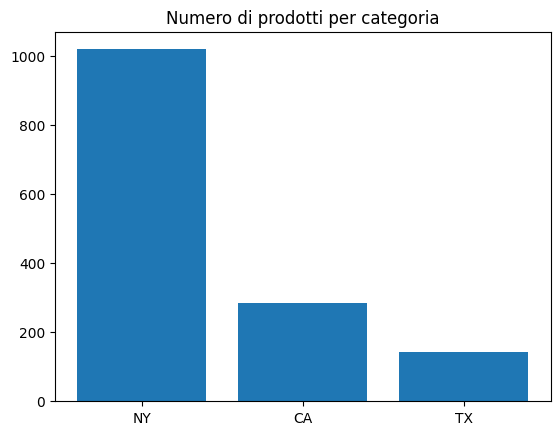

In [32]:
import matplotlib.pyplot as plt

dati = clientixstato['customer_id']
labels = clientixstato['state']

plt.bar(labels, dati)
plt.title('Numero di prodotti per categoria')
plt.show()

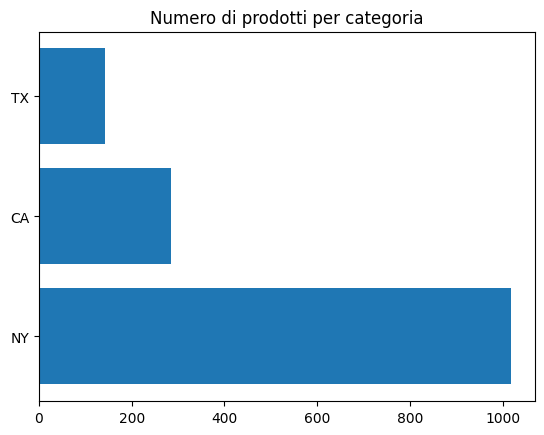

In [33]:
plt.barh(labels, dati)
plt.title('Numero di prodotti per categoria')
plt.show()

([<matplotlib.patches.Wedge at 0x7fedf2e824f0>,
 [Text(-0.6609880286911742, 0.8792581110953459, 'NY'),
  Text(0.3625812345384464, -1.0385253238898782, 'CA'),
  Text(1.0479942298682925, -0.334227608319188, 'TX')])

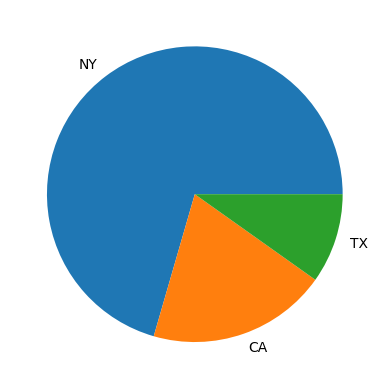

In [38]:
fig, ax = plt.subplots()
ax.pie(dati, labels=labels)

6. Il nome, il cognome e il telefono dei clienti di cui non si conosce la mail

In [41]:
df[df['email'].isna()][['first_name','last_name', 'phone']]

,first_name,last_name,phone
133,Brianna,Moss,(516) 156-8031
137,Jone,Bernard,(657) 536-5165
180,Olevia,Pitts,NaN
184,Morton,Lee,NaN
230,Jenee,Rasmussen,(916) 219-1774
238,Felice,Guzman,NaN
239,Le,Deleon,NaN


7. Il nome e il cognome dei clienti che hanno la mail di un particolare provider inserito dall'utente (esempio google.com)

In [49]:
provider = str(input('Inserisci il provider:' ))
risultato = df[df['email'].str.endswith(f'@{provider}', na=False)][['first_name', 'last_name']]
if len(risultato) == 0:
  print('Non è presente alcun cliente che utilizza il provider: ', provider)
else:
  print(risultato)

Inserisci il provider:hotmail.com
     first_name last_name
5       Lyndsey      Bean
6       Latasha      Hays
11        Robby     Sykes
13        Garry  Espinoza
15       Emmitt   Sanchez
...         ...       ...
1420      Edris   Barrett
1421     Tempie  Jacobson
1423   Lashunda      Cole
1429      Tayna      Wade
1436        Son    Warner

[266 rows x 2 columns]
